In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('uniprot links_2.csv')
#data.head()
print(data.loc[data['UniProtID'] == 'Q8DNV6'])

      DrugBankID                                               Name  \
14349    DB06970  2-CHLORO-N-(3-CYANO-5,6-DIHYDRO-4H-CYCLOPENTA[...   

                    Type UniProtID  \
14349  SmallMoleculeDrug    Q8DNV6   

                                             UniProtName  
14349  UDP-N-acetylmuramoyl-tripeptide--D-alanyl-D-al...  


In [3]:
data.iloc[:,3].max()

'T1RTG8'

In [4]:
data[(data.UniProtID=="P01116")].DrugBankID

15316    DB07771
15339    DB07780
Name: DrugBankID, dtype: object

In [5]:
data.describe()

,DrugBankID,Name,Type,UniProtID,UniProtName
count,20061,20061,20061,20061,20061
unique,7370,7370,2,4763,4255
top,DB12010,Fostamatinib,SmallMoleculeDrug,P24941,Cyclin-dependent kinase 2
freq,306,306,19134,136,136


In [6]:
data.isnull().sum()

DrugBankID     0
Name           0
Type           0
UniProtID      0
UniProtName    0
dtype: int64

In [7]:
grouped=data.groupby(['DrugBankID']).count()
grouped.head()

,Name,Type,UniProtID,UniProtName
DrugBankID,,,,
DB00001,1,1,1,1
DB00002,12,12,12,12
DB00004,3,3,3,3
DB00005,14,14,14,14
DB00006,1,1,1,1


In [8]:
grouped['UniProtID'].mean()

2.7219810040705563

In [9]:
first100=grouped.sort_values('Name', ascending=False).head(100)
first100.head()

,Name,Type,UniProtID,UniProtName
DrugBankID,,,,
DB12010,306,306,306,306
DB11638,189,189,189,189
DB09130,147,147,147,147
DB00157,144,144,144,144
DB01593,124,124,124,124


(array([19., 27.,  4., 13.,  8.,  1.,  0.,  4.,  3.,  5.,  2.,  1.,  0.,
         1.,  0.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 22.  ,  24.84,  27.68,  30.52,  33.36,  36.2 ,  39.04,  41.88,
         44.72,  47.56,  50.4 ,  53.24,  56.08,  58.92,  61.76,  64.6 ,
         67.44,  70.28,  73.12,  75.96,  78.8 ,  81.64,  84.48,  87.32,
         90.16,  93.  ,  95.84,  98.68, 101.52, 104.36, 107.2 , 110.04,
        112.88, 115.72, 118.56, 121.4 , 124.24, 127.08, 129.92, 132.76,
        135.6 , 138.44, 141.28, 144.12, 146.96, 149.8 , 152.64, 155.48,
  

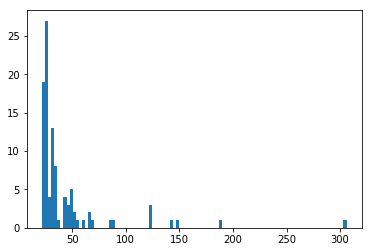

In [10]:
plt.hist(first100['Name'], bins=100)

(array([6.575e+03, 3.500e+02, 1.480e+02, 8.700e+01, 5.400e+01, 3.800e+01,
        1.900e+01, 3.400e+01, 1.100e+01, 8.000e+00, 1.200e+01, 5.000e+00,
        1.000e+00, 3.000e+00, 4.000e+00, 3.000e+00, 4.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

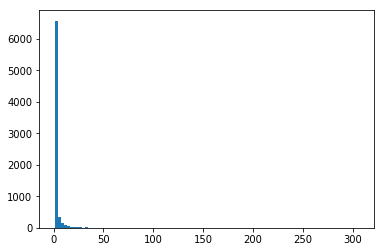

In [12]:
plt.hist(grouped['Name'], bins=100)

In [11]:
c= data.groupby(['UniProtID']).count()
c

,DrugBankID,Name,Type,UniProtName
UniProtID,,,,
A0A023W3H0,1,1,1,1
A0A0E1R3H3,1,1,1,1
A0A0H2UQB5,1,1,1,1
A0A0H2URW2,1,1,1,1
A0A0H2WWQ9,1,1,1,1
A0A0H2XJ39,1,1,1,1
A0A0H2Z368,1,1,1,1
A0A0H3JRU9,1,1,1,1
A0A0H3JWX6,2,2,2,2


In [28]:
for name in set(data['UniProtName']):
    a=set(data.loc[data['UniProtName'] == name]['UniProtID'])
    if len(a) > 1:
        print(name,a)


Phenylalanine--tRNA ligase alpha subunit {'Q4L5E3', 'Q9Y285'}
Malate dehydrogenase {'Q9ZF99', 'P61889', 'P80040'}
tRNA (guanine-N(1)-)-methyltransferase {'P43912', 'P0A876'}
GTP cyclohydrolase 1 {'P0A6T8', 'P30793'}
Uracil phosphoribosyltransferase {'Q5KUI3', 'Q9WZI0'}
Nitric oxide synthase oxygenase {'O34453', 'P0A094'}
Pantothenate synthetase {'P9WIL5', 'Q5SHF5'}
Cell division protein FtsZ {'P9WN95', 'O08398'}
Tyrosine-protein kinase transforming protein Src {'P63185', 'P00524'}
Endo-1,4-beta-xylanase A {'Q60037', 'Q8GJ44', 'P26514'}
GMP synthase [glutamine-hydrolyzing] {'P49915', 'P04079'}
Peptide deformylase {'Q8DP79', 'P0A6K3', 'Q93LE9', 'P9WIJ3', 'Q8NX78', 'P68771', 'Q9I7A8', 'P43522', 'P96113', 'P68826', 'Q672W7', 'Q8I372', 'Q82ZJ0'}
Thymidine kinase {'P06478', 'Q9PPP5', 'P09250', 'Q9QNF7', 'P0C0E6', 'P24425', 'P03176'}
Deoxyribodipyrimidine photo-lyase {'P05327', 'P61497', 'P00914'}
D-alanyl-D-alanine endopeptidase {'P0AFI5', 'P72161'}
Urease subunit alpha {'P18314', 'P41020'}


Flavohemoprotein {'P24232', 'P39662'}
Glucose-1-phosphate thymidylyltransferase {'Q9HU22', 'P26393'}
2-dehydro-3-deoxyphosphooctonate aldolase {'P0A716', 'O66496'}
Ribosome-recycling factor {'P0A805', 'P0A808'}
Elongation factor Tu {'Q83JC4', 'Q01698'}
Hexokinase {'Q26609', 'Q02155'}
Copper-containing nitrite reductase {'P25006', 'O68601'}
DNA-directed RNA polymerase subunit alpha {'Q9Z9H6', 'P0A7Z4', 'Q5SHR6'}
3-alpha-(or 20-beta)-hydroxysteroid dehydrogenase {'P9WGT1', 'P19992'}
3-mercaptopyruvate sulfurtransferase {'P31142', 'Q7K9G0'}
30S ribosomal protein S17 {'P62658', 'P0DOY7'}
Oxidoreductase {'Q7SID9', 'Q7SIA3'}
Aldehyde oxidoreductase {'Q9REC4', 'Q46509'}
Phospholipase D {'P84147', 'Q53728'}
Cellulase B {'Q54331', 'O07653'}
Neuraminidase {'P06818', 'P06820', 'P27907', 'P11485', 'P03472', 'P03474'}
FMN-dependent NADH-azoreductase {'P63462', 'P41407'}
Chloramphenicol acetyltransferase {'P26841', 'P62580'}
Fumarate reductase iron-sulfur subunit {'P0AC47', 'P17596'}
o-succinylbenzo

In [29]:
dict1 = {}
counter = 1
for item in set(data['DrugBankID']):
    dict1[item] = counter
    counter += 1
print(dict1)

{'DB04854': 1, 'DB03499': 2, 'DB00578': 3, 'DB05867': 4, 'DB04495': 5, 'DB07358': 6, 'DB09108': 7, 'DB00292': 8, 'DB09045': 9, 'DB07751': 10, 'DB02160': 11, 'DB14597': 12, 'DB03390': 13, 'DB02048': 14, 'DB01306': 15, 'DB00381': 16, 'DB07622': 17, 'DB01175': 18, 'DB00256': 19, 'DB05712': 20, 'DB03925': 21, 'DB07129': 22, 'DB00433': 23, 'DB01815': 24, 'DB03832': 25, 'DB01909': 26, 'DB13932': 27, 'DB12498': 28, 'DB11611': 29, 'DB04101': 30, 'DB06678': 31, 'DB07672': 32, 'DB11590': 33, 'DB02970': 34, 'DB01454': 35, 'DB01415': 36, 'DB02274': 37, 'DB08246': 38, 'DB07488': 39, 'DB02370': 40, 'DB02401': 41, 'DB08723': 42, 'DB04456': 43, 'DB08532': 44, 'DB07642': 45, 'DB03442': 46, 'DB04866': 47, 'DB01132': 48, 'DB04422': 49, 'DB02108': 50, 'DB07063': 51, 'DB07555': 52, 'DB02107': 53, 'DB12202': 54, 'DB04485': 55, 'DB08595': 56, 'DB08191': 57, 'DB08918': 58, 'DB08730': 59, 'DB03296': 60, 'DB07423': 61, 'DB12128': 62, 'DB00365': 63, 'DB00580': 64, 'DB07478': 65, 'DB06924': 66, 'DB02421': 67, 'DB

In [30]:
data["DrugBankIDLabel"]=data["DrugBankID"].map(dict1) 
data.head()


,DrugBankID,Name,Type,UniProtID,UniProtName,DrugBankIDLabel
0,DB00001,Lepirudin,BiotechDrug,P00734,Prothrombin,5223
1,DB00002,Cetuximab,BiotechDrug,P00533,Epidermal growth factor receptor,5182
2,DB00002,Cetuximab,BiotechDrug,O75015,Low affinity immunoglobulin gamma Fc region re...,5182
3,DB00002,Cetuximab,BiotechDrug,P00736,Complement C1r subcomponent,5182
4,DB00002,Cetuximab,BiotechDrug,P02745,Complement C1q subcomponent subunit A,5182


In [31]:
dict2 = {}
counter2 = 1
for item in set(data['UniProtID']):
    dict2[item] = counter2
    counter2 += 1
print(dict2)

{'P0A434': 1, 'Q8TDS4': 2, 'O75838': 3, 'Q9UHQ9': 4, 'Q54AI1': 5, 'P13995': 6, 'P08069': 7, 'P0A3Y5': 8, 'P37698': 9, 'P16581': 10, 'Q8RLY5': 11, 'Q82122': 12, 'O43293': 13, 'O15554': 14, 'P9WPQ5': 15, 'D6R448': 16, 'P54760': 17, 'P18846': 18, 'Q08638': 19, 'P0A6A8': 20, 'Q9Y5Y9': 21, 'P04632': 22, 'Q14833': 23, 'Q56408': 24, 'P53779': 25, 'P19440': 26, 'P27142': 27, 'P00644': 28, 'P35914': 29, 'P14867': 30, 'Q96Q40': 31, 'Q00653': 32, 'P16112': 33, 'Q672W7': 34, 'P06881': 35, 'P01556': 36, 'Q146M9': 37, 'P16640': 38, 'O93182': 39, 'P35869': 40, 'Q02763': 41, 'P0AEX9': 42, 'Q14626': 43, 'P13254': 44, 'Q93LE9': 45, 'P08603': 46, 'P45124': 47, 'P02925': 48, 'P43487': 49, 'Q13285': 50, 'P05186': 51, 'P57078': 52, 'P00808': 53, 'Q9UHY7': 54, 'Q6N063': 55, 'A1A2B5': 56, 'Q64823': 57, 'Q13639': 58, 'P16502': 59, 'Q15428': 60, 'Q8GN86': 61, 'P51648': 62, 'P23677': 63, 'P49908': 64, 'P29422': 65, 'Q02224': 66, 'Q15493': 67, 'P0AG16': 68, 'Q6P093': 69, 'P22570': 70, 'A5X5Y0': 71, 'P24474': 72, 

In [33]:
print(list(dict1.keys())[list(dict1.values()).index(1)])

DB04854


In [43]:
print(list(dict2.keys())[list(dict2.values()).index(3020)])

Q16513


In [110]:
data["UniProtIDLabel"]=data["UniProtID"].map(dict2) 
data.head()

,DrugBankID,Name,Type,UniProtID,UniProtName,DrugBankIDLabel,UniProtIDLabel
0,DB00001,Lepirudin,BiotechDrug,P00734,Prothrombin,593,1299
1,DB00002,Cetuximab,BiotechDrug,P00533,Epidermal growth factor receptor,6639,3561
2,DB00002,Cetuximab,BiotechDrug,O75015,Low affinity immunoglobulin gamma Fc region re...,6639,4525
3,DB00002,Cetuximab,BiotechDrug,P00736,Complement C1r subcomponent,6639,3283
4,DB00002,Cetuximab,BiotechDrug,P02745,Complement C1q subcomponent subunit A,6639,2352


In [111]:
data["Interaction"]=1
data.head()

,DrugBankID,Name,Type,UniProtID,UniProtName,DrugBankIDLabel,UniProtIDLabel,Interaction
0,DB00001,Lepirudin,BiotechDrug,P00734,Prothrombin,593,1299,1
1,DB00002,Cetuximab,BiotechDrug,P00533,Epidermal growth factor receptor,6639,3561,1
2,DB00002,Cetuximab,BiotechDrug,O75015,Low affinity immunoglobulin gamma Fc region re...,6639,4525,1
3,DB00002,Cetuximab,BiotechDrug,P00736,Complement C1r subcomponent,6639,3283,1
4,DB00002,Cetuximab,BiotechDrug,P02745,Complement C1q subcomponent subunit A,6639,2352,1


In [80]:
data1=data[["DrugBankIDLabel", "UniProtIDLabel","Interaction"]]
data1

,DrugBankIDLabel,UniProtIDLabel,Interaction
0,593,1299,1
1,6639,3561,1
2,6639,4525,1
3,6639,3283,1
4,6639,2352,1
5,6639,2487,1
6,6639,2212,1
7,6639,2450,1
8,6639,2193,1
9,6639,432,1


In [112]:
data1.to_csv('Interaction_positive only.csv', index=False)

In [113]:
data1["DrugBankIDLabel"].max()

7370

In [114]:
data1["UniProtIDLabel"].max()

4763

In [84]:
dict3 = {}
counter3=1
for i in range(20061):
    dict3[data1.iloc[i, 0], data1.iloc[i, 1]] = counter3
    counter3 += 1

dict3


{(593, 1299): 1,
 (6639, 3561): 2,
 (6639, 4525): 3,
 (6639, 3283): 4,
 (6639, 2352): 5,
 (6639, 2487): 6,
 (6639, 2212): 7,
 (6639, 2450): 8,
 (6639, 2193): 9,
 (6639, 432): 10,
 (6639, 114): 11,
 (6639, 1277): 12,
 (6639, 266): 13,
 (1146, 2731): 14,
 (1146, 3575): 15,
 (1146, 2003): 16,
 (2515, 971): 17,
 (2515, 931): 18,
 (2515, 432): 19,
 (2515, 2450): 20,
 (2515, 114): 21,
 (2515, 1277): 22,
 (2515, 266): 23,
 (2515, 3849): 24,
 (2515, 4525): 25,
 (2515, 2193): 26,
 (2515, 3283): 27,
 (2515, 2352): 28,
 (2515, 2487): 29,
 (2515, 2212): 30,
 (5678, 1299): 31,
 (6500, 3111): 32,
 (5147, 1122): 33,
 (5147, 1695): 34,
 (1628, 258): 35,
 (1628, 1147): 36,
 (1628, 4185): 37,
 (1628, 3472): 38,
 (3346, 4660): 39,
 (3425, 1122): 40,
 (3425, 1695): 41,
 (3239, 3141): 42,
 (3943, 258): 43,
 (3943, 4185): 44,
 (3943, 785): 45,
 (3943, 1275): 46,
 (3943, 3472): 47,
 (3943, 293): 48,
 (3943, 3859): 49,
 (3943, 585): 50,
 (3943, 162): 51,
 (3943, 675): 52,
 (1477, 1131): 53,
 (1477, 3111): 54,

In [21]:
(4855,637) in dict3

False

In [115]:
import random
for i in range(30000):
    a=random.randint(1,7370)
    b=random.randint(1,4763)
    if (a,b) in dict3:
        continue
    data1.loc[20061+i]=[a,b,0]
data1

,DrugBankIDLabel,UniProtIDLabel,Interaction
0,593,1299,1
1,6639,3561,1
2,6639,4525,1
3,6639,3283,1
4,6639,2352,1
5,6639,2487,1
6,6639,2212,1
7,6639,2450,1
8,6639,2193,1
9,6639,432,1


In [116]:
data1.to_csv('interaction_negative and positive_30000.csv')